<a href="https://colab.research.google.com/github/Maxwellrubert/Datasets/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
datasetlink = 'https://raw.githubusercontent.com/Maxwellrubert/Datasets/main/seattle-weather.csv'
dataset = pd.read_csv(datasetlink)
dataset.head(6)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain


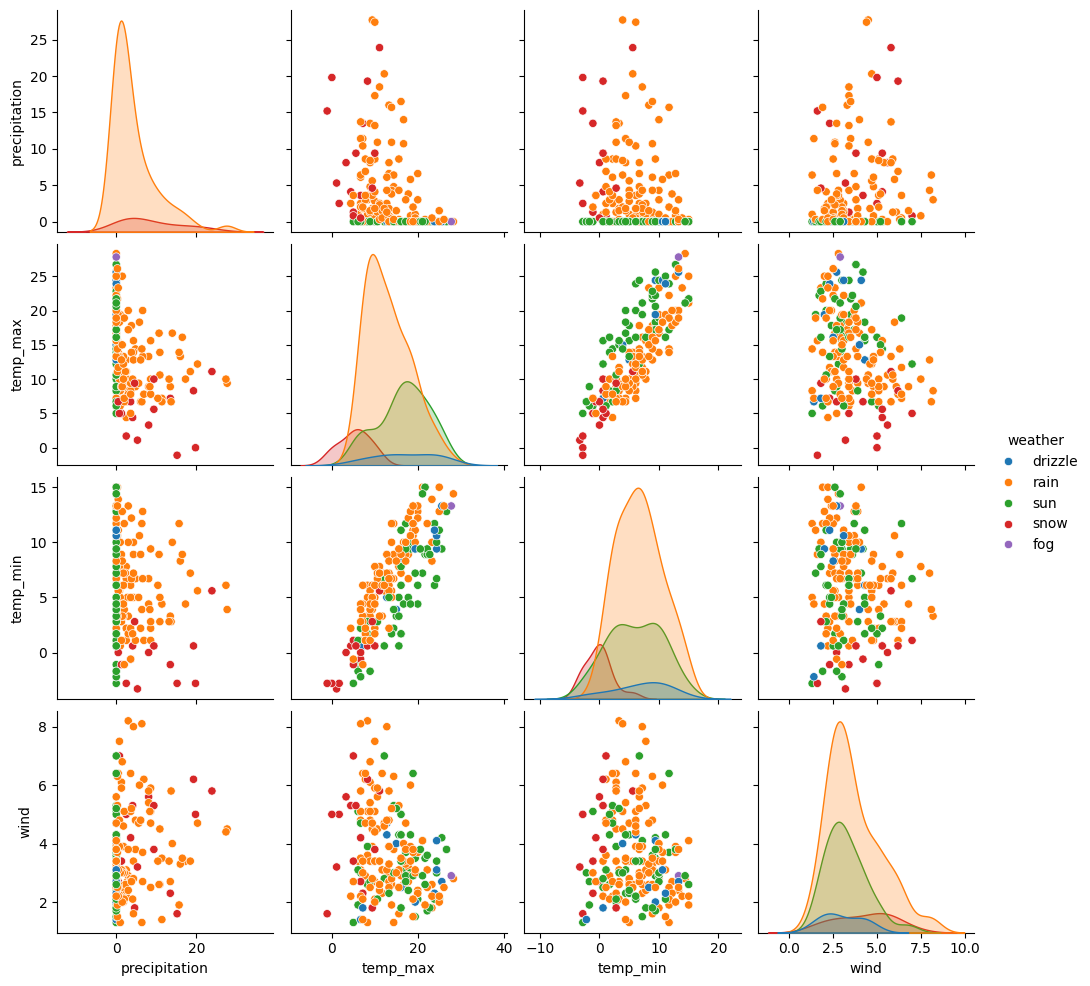

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(dataset.head(200), hue='weather')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X1 = dataset.drop('weather', axis=1)
X = X1.drop('date', axis=1)
y = dataset['weather']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X1 = dataset.drop('weather', axis=1)
X = X1.drop('date', axis=1)
y = dataset['weather']
print('X - after dropping weather column')
print(X)
print('y - dropped weather column')
print(y)

X - after dropping weather column
      precipitation  temp_max  temp_min  wind
0               0.0      12.8       5.0   4.7
1              10.9      10.6       2.8   4.5
2               0.8      11.7       7.2   2.3
3              20.3      12.2       5.6   4.7
4               1.3       8.9       2.8   6.1
...             ...       ...       ...   ...
1456            8.6       4.4       1.7   2.9
1457            1.5       5.0       1.7   1.3
1458            0.0       7.2       0.6   2.6
1459            0.0       5.6      -1.0   3.4
1460            0.0       5.6      -2.1   3.5

[1461 rows x 4 columns]
y - dropped weather column
0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy: {accuracy}")

Initial Accuracy: 0.7334851936218679


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  1   3   1   0   9]
 [  3   9   3   0  17]
 [  0   1 172   6  13]
 [  0   0   5   3   0]
 [ 18  23  15   0 137]]
              precision    recall  f1-score   support

     drizzle       0.05      0.07      0.06        14
         fog       0.25      0.28      0.26        32
        rain       0.88      0.90      0.89       192
        snow       0.33      0.38      0.35         8
         sun       0.78      0.71      0.74       193

    accuracy                           0.73       439
   macro avg       0.46      0.47      0.46       439
weighted avg       0.75      0.73      0.74       439



In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 7, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
improved_accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Accuracy: {improved_accuracy}")

Improved Accuracy: 0.8428246013667426


In [19]:
print("Initial Model:")
print(classification_report(y_test, model.predict(X_test)))

print("Improved Model:")
print(classification_report(y_test, y_pred))

Initial Model:
              precision    recall  f1-score   support

     drizzle       0.05      0.07      0.06        14
         fog       0.25      0.28      0.26        32
        rain       0.88      0.90      0.89       192
        snow       0.33      0.38      0.35         8
         sun       0.78      0.71      0.74       193

    accuracy                           0.73       439
   macro avg       0.46      0.47      0.46       439
weighted avg       0.75      0.73      0.74       439

Improved Model:
              precision    recall  f1-score   support

     drizzle       0.50      0.07      0.12        14
         fog       0.00      0.00      0.00        32
        rain       0.96      0.91      0.94       192
        snow       0.33      0.12      0.18         8
         sun       0.77      1.00      0.87       193

    accuracy                           0.84       439
   macro avg       0.51      0.42      0.42       439
weighted avg       0.78      0.84      0.80   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
